In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

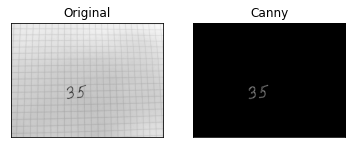

In [20]:
source_img = cv2.imread('./dataset/photo2.jpg')
height, width, colors = source_img.shape

# if height > width:
#     source_img = rotate_image(source_img, 90)
source_img = cv2.GaussianBlur(source_img, (3, 3), 0)
source_img = cv2.cvtColor(source_img, cv2.COLOR_BGR2GRAY)

img = cv2.resize(source_img, (640, 480), interpolation = cv2.INTER_AREA)
edges = cv2.Canny(img, 100, 300)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.show()

In [8]:
def get_box_points(contour):
    left = 9999
    top = 9999
    right = 0
    bottom = 0
    for point in contour:
        if point[0][0] < left:
            left = int(point[0][0])
        if point[0][0] > right:
            right = int(point[0][0])
            
        if point[0][1] < top:
            top = int(point[0][1])
        if point[0][1] > bottom:
            bottom = int(point[0][1])
            
    return (left, top), (right, bottom)

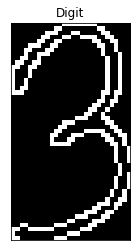

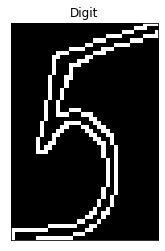

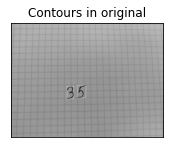

In [23]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
digits = []
contours_img = img.copy()

for contour in contours:
    left_top, right_bottom = get_box_points(contour)
    digits.append(edges[left_top[1]:right_bottom[1],left_top[0]:right_bottom[0]])
    
    cv2.rectangle(contours_img, left_top, right_bottom, (255, 0, 0), 1)
    
    plt.subplot(122),plt.imshow(edges[left_top[1]:right_bottom[1],left_top[0]:right_bottom[0]], cmap='gray')
    
    plt.title('Digit'), plt.xticks([]), plt.yticks([])
#     plt.savefig('plot{0}.png'.format(left_top))
    plt.show()

plt.subplot(121),plt.imshow(contours_img, cmap='gray')
plt.title('Contours in original'), plt.xticks([]), plt.yticks([])
# plt.savefig('plot.png')
plt.show()


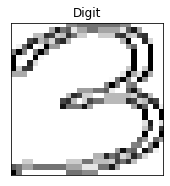

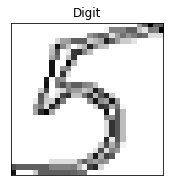

In [25]:
digits28 = []
for digit in digits:
    digit = (255 - digit)
    digit = cv2.resize(digit, (28, 28), interpolation = cv2.INTER_AREA)
    digits28.append(digit)
    plt.subplot(121),plt.imshow(digit, cmap='gray')
    plt.title('Digit'), plt.xticks([]), plt.yticks([])
    plt.savefig('plot{0}.png'.format(digit[0]))
    plt.show()


In [15]:
import keras
model_path = './saved_model/'

loaded_model = keras.models.load_model(model_path)

In [33]:
x_train = digits28[0].copy()
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(-1, 784)
# x_train = x_train.astype('int32')

results = loaded_model.predict(x_train)
results *= 100
results = results.astype('int32')
print(results)

[[ 0  0  2 80  0  5  0 11  0  0]]
